# problem 2.1

read data

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('../sensor_data/sensor_data_200.txt', delimiter=' ', names=['date','time','ir','lidar'])
data

,date,time,ir,lidar
0,20180122,95819,305,214
1,20180122,95822,299,211
2,20180122,95826,292,199
3,20180122,95829,321,208
4,20180122,95832,298,212
...,...,...,...,...
58983,20180124,120023,313,208
58984,20180124,120026,297,200
58985,20180124,120030,323,204
58986,20180124,120033,326,207


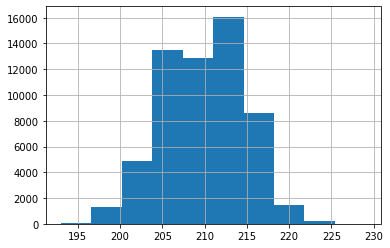

In [3]:
data['lidar'].hist()

## make function for extracting n samples 

In [4]:
def extract(data: pd.DataFrame, n: int) -> pd.DataFrame:
    return data.sample(n=n)

## a. extract n=3, and compute its sample variance

In [5]:
sample3 = extract(data['lidar'], n=3)
sample3

29626    206
6419     211
10091    208
Name: lidar, dtype: int64

In [6]:
sample3.var(ddof=0) #ddof: Delta Degrees of Freedom. The divisor used in calculations is N - ddof

4.222222222222222

## b. run a 10000 times, and compute mean of the sample variance.

In [8]:
vars = [ extract(data['lidar'], n=3).var(ddof=0) for i in range(10000)]

In [9]:
import numpy as np

In [10]:
np.mean(vars)

15.520022222222218

## c. compute unbiased variance for n=3 data

In [11]:
extract(data['lidar'], n=3).var()

25.333333333333336

## d. run c 10000 times, and compute the mean of unbiased variance

In [12]:
vars2 = [extract(data['lidar'], n=3).var() for i in range(10000)]

In [13]:
np.mean(vars2)

23.600199999999997

# problem 2.2 simulate a dice.
 1. shoot a dice 10 times
 2. add 200 to the sum.
 3. iterate 1,2 10000 times. draw histogram. 

In [27]:

import random
import matplotlib.pyplot as plt


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe21160b690>]],
      dtype=object)

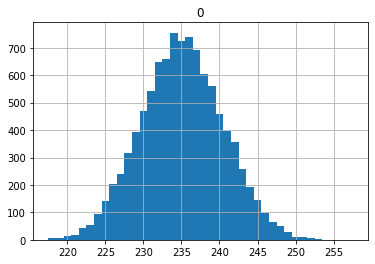

In [37]:
vals = []

for i in range(10000):  
    samples = [random.choice([1,2,3,4,5,6]) for j in range(10)]
    vals.append(sum(samples) + 200)

data = pd.DataFrame(vals)
data.hist(bins=max(vals)-min(vals), align='left')

In [39]:
data.mean()

0    235.0764
dtype: float64

In [40]:
data.var()

0    29.183881
dtype: float64

In [41]:
onedice = [random.choice([1,2,3,4,5,6]) for i in range(10000)]

In [43]:
np.mean(onedice)

3.5132

In [45]:
np.var(onedice, ddof=1)

2.9487206320632064